## Life Expectancy and GDP

This is a project launched at Codecademy and it is a part of Data Scientist Career Path. More information [here](https://www.codecademy.com/learn/paths/data-science)

# Introduction

This project will investigate if there is a strong correlation between the economic output of a country and the life expectancy of its citizens.

The goals are to prepare data, followed by analysis with plots, and seek to explain the findings from the study.

Here are a few questions that this project will seek to answer:

+ Has Life Expectancy increased over time in the six nations?
+ Has GDP increased over time in the six nations?
+ Is there a correlation between GDP and Life Expectancy of a country?
+ What is the average Life Expectancy and GDP in these nations?
+ What is the distribution of that Life Expectancy and GDP?

**Data sources**

- GDP Source: [World Bank](https://data.worldbank.org/indicator/NY.GDP.MKTP.CD) national accounts data, and OECD National Accounts data files.

- Life Expectancy Data Source: [World Health Organization](http://apps.who.int/gho/data/node.main.688)

## Import Python Modules

First import the preliminary modules that will be used in this project:

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from scipy.stats import normaltest
from scipy.stats import kendalltau
from scipy.stats import ttest_ind
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Load the Data

* To look for connections between GDP and life expectancy load the datasets into DataFrames so that they can be visualized.
* the data are provided by Codecademy and stored in a file **all_data.csv**

In [2]:
df = pd.read_csv('all_data.csv')

In [3]:
df.head() # first 5 rows

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


In [4]:
df.tail() # last 5 rows 

,Country,Year,Life expectancy at birth (years),GDP
91,Zimbabwe,2011,54.9,1.209845e+10
92,Zimbabwe,2012,56.6,1.424249e+10
93,Zimbabwe,2013,58.0,1.545177e+10
94,Zimbabwe,2014,59.2,1.589105e+10
95,Zimbabwe,2015,60.7,1.630467e+10


## Exploratory Data Analysis

#### Find Unique Values

First we need to know what uniques countries we have in your file __all_data__

In [5]:
unique_country = df['Country'].unique()
print(unique_country)

['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']


Secondly we need to find out the year range in file __all_data__

In [6]:
unique_year = df['Year'].unique()
print(unique_year)

[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]


Check if each country have the same amount of records

In [7]:
df['Country'].value_counts()

China                       16
Zimbabwe                    16
United States of America    16
Chile                       16
Germany                     16
Mexico                      16
Name: Country, dtype: int64

Find how many rows and columns (respectively) we have in DataFrame

In [8]:
df.shape

(96, 4)

Checked how many empty values are in columns and it seems that we don't have any in DataFrame

In [9]:
df.isnull().sum()

Country                             0
Year                                0
Life expectancy at birth (years)    0
GDP                                 0
dtype: int64

#### Clean Column Name 

In DataFrame all columns name are one word which make it easy to work on it. Exception is a column name: 'Life expectancy at birth (years)'. It will be much easier if I change this name and set it as 'Life'.

In [10]:
df.rename(columns={'Life expectancy at birth (years)':'Life_Exp', 'GDP': 'GDP in Trillions'}, inplace=True)
df.head()

,Country,Year,Life_Exp,GDP in Trillions
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


#### Formatting GDP Column to improve readability

In [11]:
df['GDP in Trillions'] = ['{:,.3f}'.format(x/10**12) for x in df['GDP in Trillions']]
df['GDP in Trillions'] = pd.to_numeric(df['GDP in Trillions'])

In [12]:
df.head()

,Country,Year,Life_Exp,GDP in Trillions
0,Chile,2000,77.3,0.078
1,Chile,2001,77.3,0.071
2,Chile,2002,77.8,0.070
3,Chile,2003,77.9,0.076
4,Chile,2004,78.0,0.099


Summary statistics for DataFrame

In [13]:
df.describe()

,Year,Life_Exp,GDP in Trillions
count,96.000000,96.000000,96.000000
mean,2007.500000,72.789583,3.880490
std,4.633971,10.672882,5.197577
min,2000.000000,44.300000,0.004000
25%,2003.750000,74.475000,0.173500
50%,2007.500000,76.750000,1.280000
75%,2011.250000,78.900000,4.067750
max,2015.000000,81.000000,18.100000


**Summary:** We have 6 countries: Chile, China, Germany, Mexico, United States of America, Zimbabwe and each have the same amount of records. We analyse GDP (Gross Domestic Product) and Life Expectancy from 2000 to 2015 year. We can see that the Life Expectancy mean is 72 year. Looking at quartiles can tell us that probably average Life Expectancy is affected by one (or more) country with low Life Expectancy level. The average amount of GDP is 3.88 trillion U.S. dollars but looking at quartiles we can noticed that at least one country noticed low level of GDP. The interquartile range is 0.17 - 4.07 trillion U.S. dollars.

## Shape of Data - Distribution

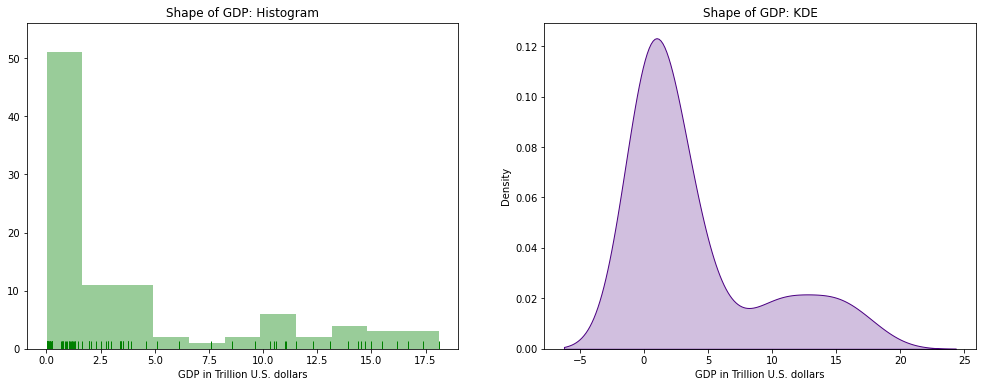

In [14]:
plt.figure(figsize=(17,6))

plt.subplot(1, 2, 1)
sns.distplot(df['GDP in Trillions'], kde=False, rug=True, color='Green')
plt.title('Shape of GDP: Histogram')
plt.xlabel('GDP in Trillion U.S. dollars')

plt.subplot(1, 2, 2)
sns.kdeplot(df['GDP in Trillions'], shade=True, color='Indigo')
plt.xlabel('GDP in Trillion U.S. dollars')
plt.title('Shape of GDP: KDE')
plt.show()

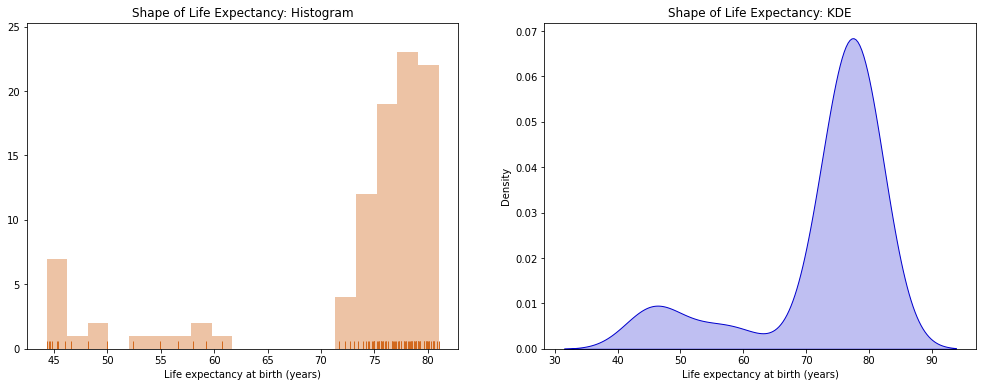

In [15]:
plt.figure(figsize=(17,6))

plt.subplot(1, 2, 1)
sns.distplot(df['Life_Exp'], kde=False, rug=True, color='Chocolate')
plt.title('Shape of Life Expectancy: Histogram')
plt.xlabel('Life expectancy at birth (years)')

plt.subplot(1, 2, 2)
sns.kdeplot(df['Life_Exp'], shade=True, color='MediumBlue')
plt.xlabel('Life expectancy at birth (years)')
plt.title('Shape of Life Expectancy: KDE')
plt.show()

* I examined Histogram and Kernel Density Estimator which shows us a shape of data. I choose to show both plots because it's describe how distribution of GDP and LIfe Expectancy look like. Both plots shows the same but in different way (shape of histogram is dependant from amount of bins we set).
* __Shape of GDP is Right-Skewed__ has a peak that is left of center and a more gradual tapering to the right side of the graph. Dataset has a long right tail also called positive-skew distributions. That's because there is a long tail in the positive direction on the number line. This is a unimodal data set, with the mean higher than the median. 
* __Shape of Life Expectancy is Left-Skewed__ has a peak that is right of center and a more gradual tapering to the left side of the graph. Dataset has a long left tail also called negatively-skewed distributions. That's because there is a long tail in the negative direction on the number line. This is a unimodal data set, with the median higher than the mean.

None of previous plots show us the data typical for each country so the next step will be look closer at this data. 

## Line Graphs

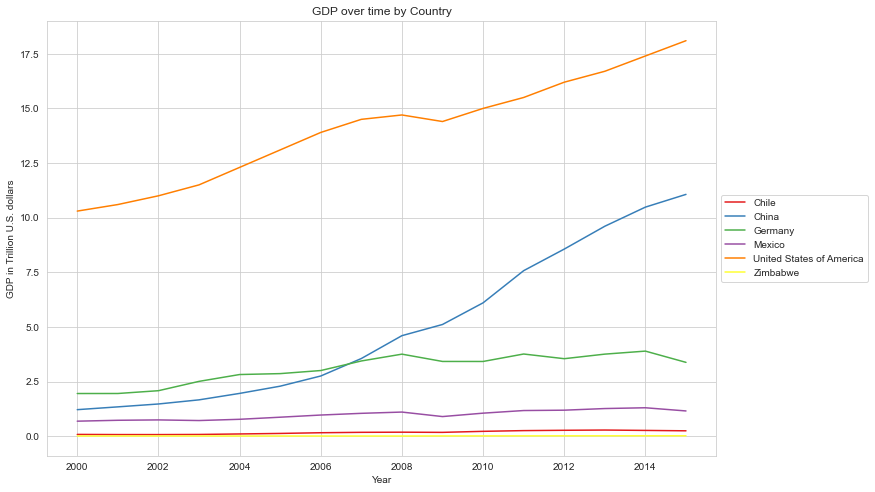

In [16]:
sns.set_style('whitegrid')
sns.set_palette('Set1')
plt.figure(figsize=(12,8))
sns.lineplot(data=df, x='Year', y='GDP in Trillions', hue='Country')
plt.title('GDP over time by Country')
plt.ylabel('GDP in Trillion U.S. dollars')
plt.legend(loc=6, bbox_to_anchor=(1, 0.5), ncol=1)
plt.show()

The line graph above show how GDP looks in each country at one time. We can see that the most impressive dynamics in growth can boast China and United States of America. We can see that China increased four times their GDP over years 2000-2015 from the level of less than 2.5 trillion U.S. dollars to more than 10 trillion U.S. dollars and none of other Country on this line chart cannot shows such spectacular results.

More specific data for each country are shows on separately line graphs.

`GDP over time by Country separately`

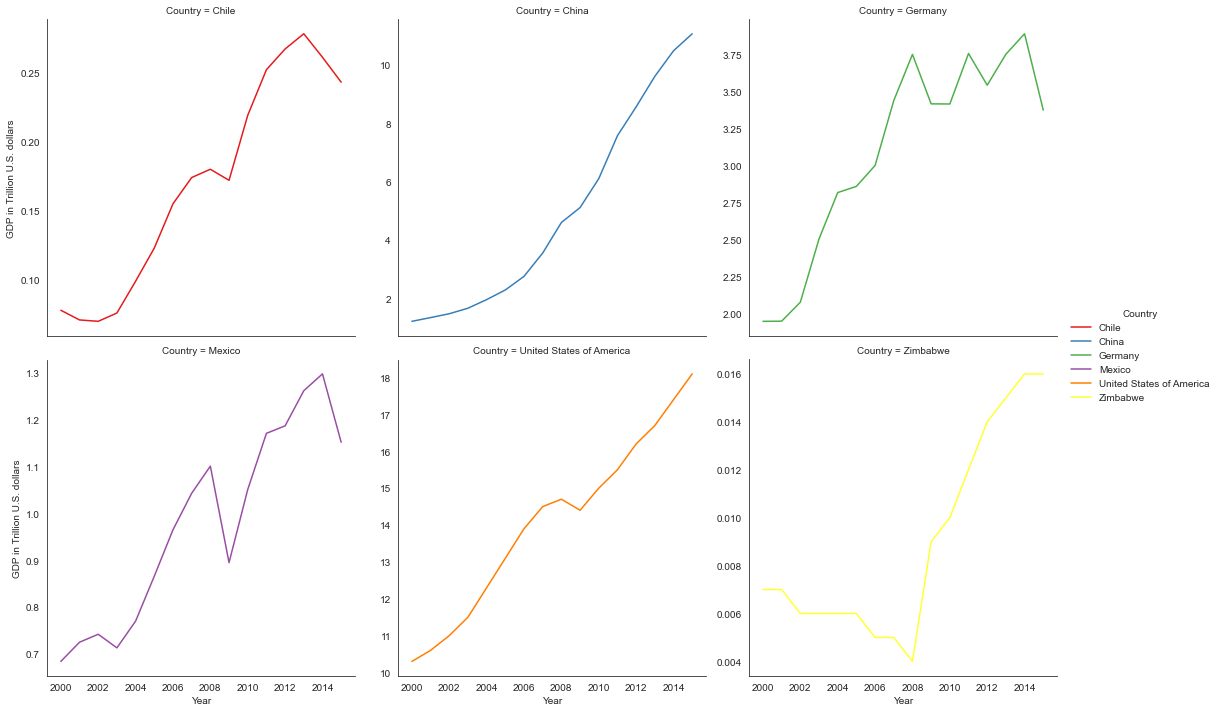

In [17]:
sns.set_style('white')
grid = sns.FacetGrid(data=df, col='Country', hue='Country', col_wrap=3, sharey=False, height=5)
grid.map(sns.lineplot, 'Year', 'GDP in Trillions')
grid.add_legend()
grid.set_axis_labels('Year', 'GDP in Trillion U.S. dollars')
plt.show()

Above we have 6 line graphs showing GDP over time for each country. This presentation help us look closer how GDP growth. Of course we can notice impresive growth of China and almost double GDP growth of United States of America. From this point of view the most interesting things is that all other country noted GDP increased in years 2000-2015. This fact was really hard to notice on our previous line chart. 

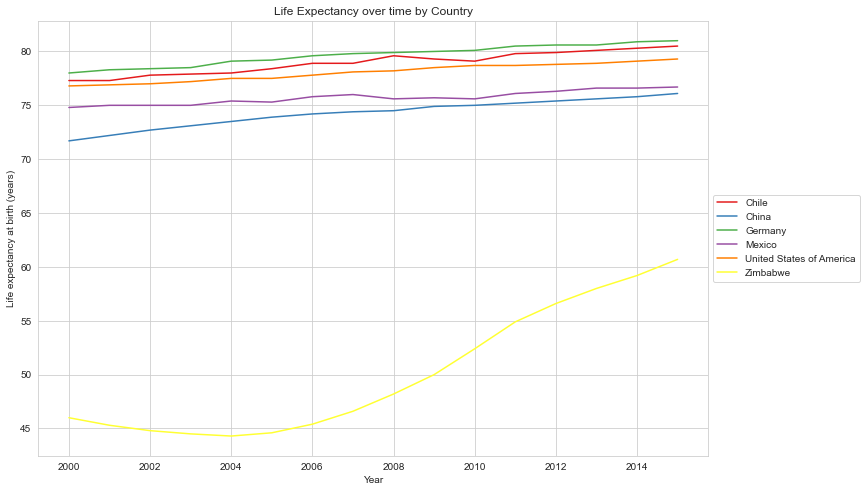

In [18]:
sns.set_style('whitegrid')
plt.figure(figsize=(12,8))
sns.lineplot(data=df, x='Year', y='Life_Exp', hue='Country')
plt.title('Life Expectancy over time by Country')
plt.ylabel('Life expectancy at birth (years)')
plt.legend(loc=6, bbox_to_anchor=(1, 0.5), ncol=1)
plt.show()

* The line graph above show how Life Expectancy looks in each country at one time. The situation of Zimbabwe comes to the fore. We know from the previous line chart that GDP in this country has the lowest level in compare to others. The same is with Life Expectancy. From one hand it could be because this is a poor african country with very low level of healthcare. But this low level of GDP and Life Expectancy was the result of civil war overwhelming this country. You can read about it more [here](https://en.wikipedia.org/wiki/History_of_Zimbabwe) 
* Secondly very interesting is a China situation. We know that their GDP growth rapidly over 2000-2015 year but Life Expectancy is not so impressive. We can see that in compare to others countries only in Zimbabwe Life Expectancy is lower than in China. 

More details about Life Expectancy can be find in line charts below. 

`Life Expectancy over time by Country separately`

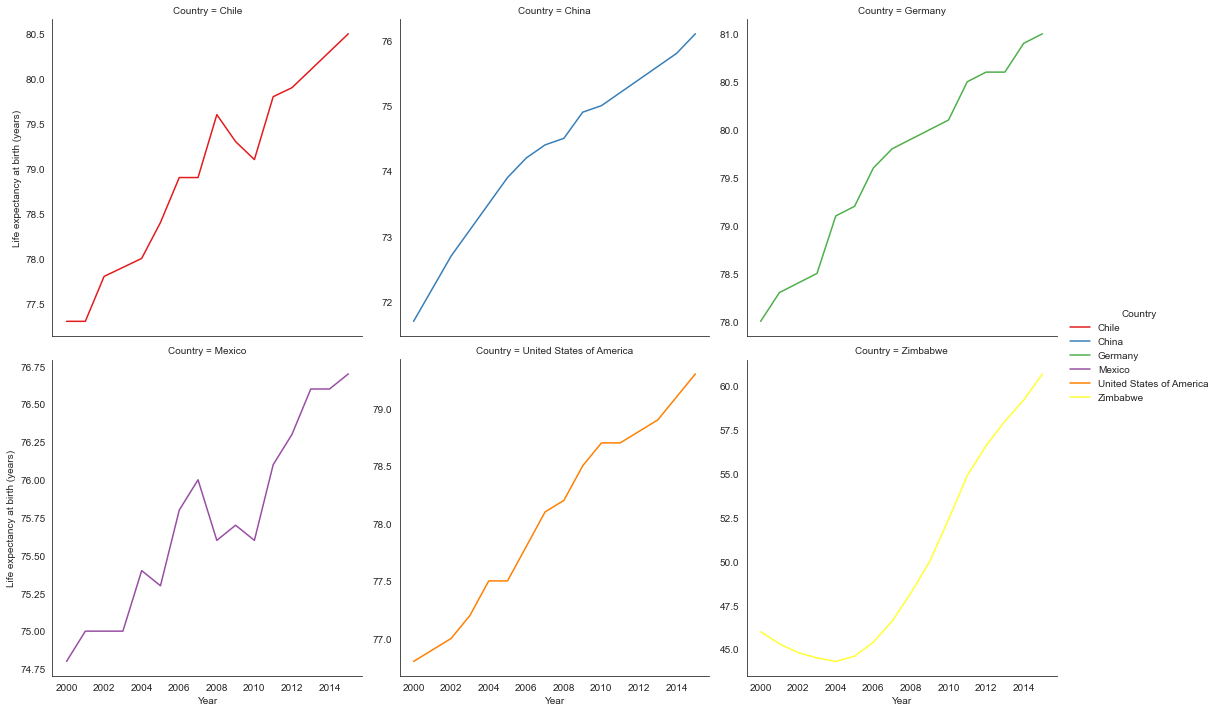

In [19]:
sns.set_style('white')
grid = sns.FacetGrid(data=df, col='Country', hue='Country', col_wrap=3, sharey=False, height=5)
grid.map(sns.lineplot, 'Year', 'Life_Exp')
grid.add_legend()
grid.set_axis_labels('Year', 'Life expectancy at birth (years)')
plt.show()

* In each country Life Expectancy increased over years 2000-2015.
* The first place in Life Expectancy Rank belong to Germany. The German healthcare system is a dual public-private system that dates back to the 1880s, making it the oldest in Europe. Today its doctors, specialists, and facilities make it one of the very best healthcare systems in the world.
* Two country from Latin America - Chile and Mexico noted dips in Life Expectancy but very quickly back to growth trend.
* Chile have one of the best healthcare system in Latin America. Even if Chile economy in compare to economy of China, United States of America, Mexico or Germany is not so big, their Life Expextancy can compare to German result. It is very impresive that Chile Life Expectancy ahead the result of United States of America.
* World Health Organization’s Ranking of the World’s Health Systems can be find [here](https://thepatientfactor.com/world-health-organizations-ranking-of-the-worlds-health-systems/)

## Bar Chart

Now it is time to find out what are the average values for each country. 

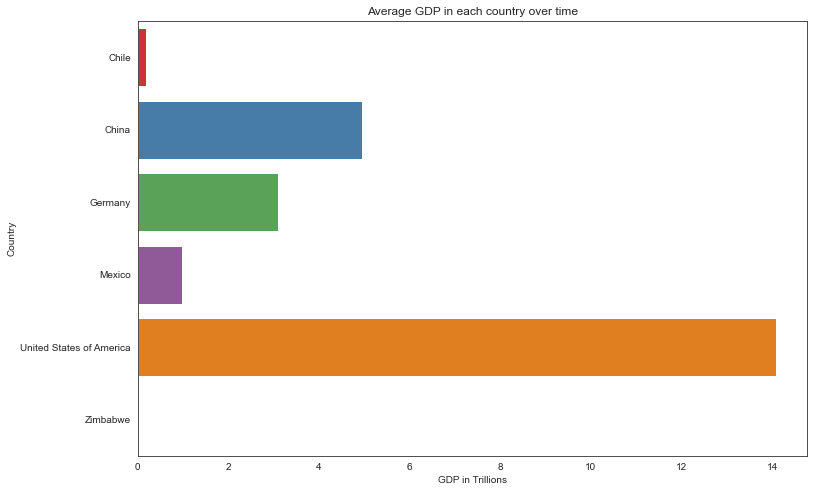

In [20]:
plt.figure(figsize=(12,8))
sns.barplot(data=df, x='GDP in Trillions', y='Country', ci=None)
plt.title('Average GDP in each country over time')
plt.show()

**Summary:** Average GDP of United States of America is the highest value in compare to others countries. The result of Zimbabwe is not even visible. A really low value of average GDP presented Chile. China, Germany and Mexico are reletively close in figure. 

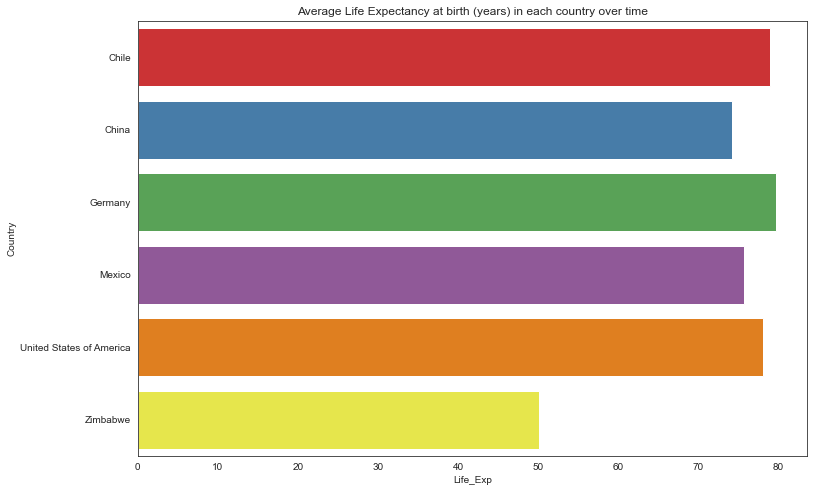

In [21]:
plt.figure(figsize=(12,8))
sns.barplot(data=df, x='Life_Exp', y='Country', ci=None)
plt.title('Average Life Expectancy at birth (years) in each country over time')
plt.show()

**Summary:** Average Life Expectancy over countries shows on bar chart above. Only Zimbabwe stands out with its result. All others countries have relatively close in figure of average Life Expectancy. The first three place belong respectively to: Germany, Chile and United States of America.

## Scatterplot

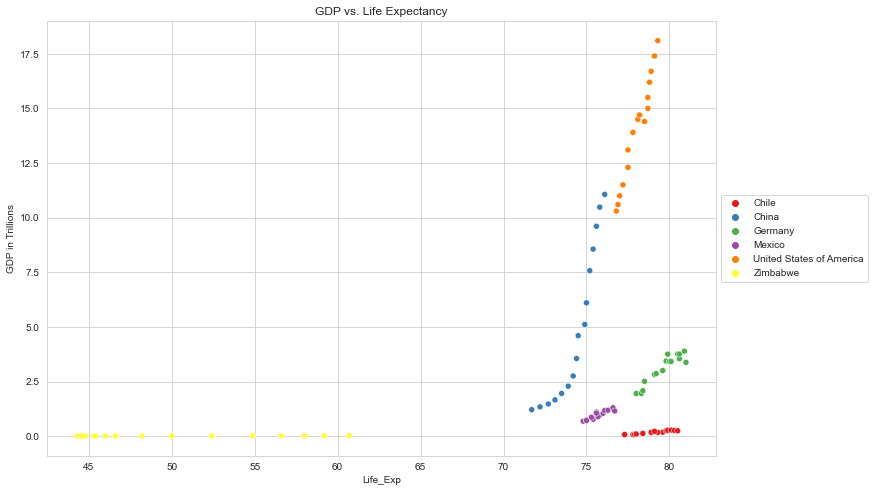

In [22]:
sns.set_style('whitegrid')
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='Life_Exp', y='GDP in Trillions', hue='Country')
plt.legend(loc=6, bbox_to_anchor=(1, 0.5), ncol=1)
plt.title('GDP vs. Life Expectancy')
plt.show()

**Summary:** The scatterplot above shows correlation between two variables: GDP and Life Expectancy. Zimbabwe result is flat. The China and United States result climbs sharply upwards. More details about each country can be find below on separately scatterplot.

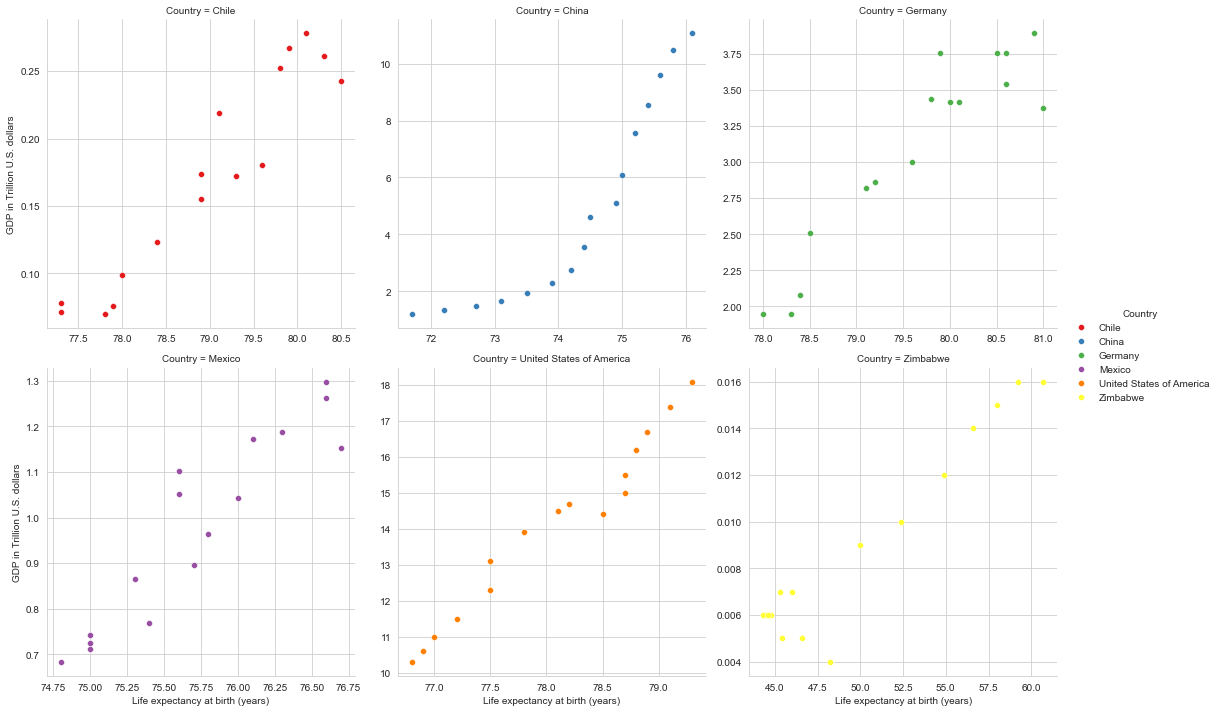

In [23]:
grid = sns.FacetGrid(data=df, col='Country', hue='Country', col_wrap=3, sharey=False, sharex=False, height=5)
grid.map(sns.scatterplot, 'Life_Exp', 'GDP in Trillions')
grid.add_legend()
grid.set_axis_labels('Life expectancy at birth (years)', 'GDP in Trillion U.S. dollars')
plt.show()

* In each country higher level of GDP means higher level of Life Expectancy - generally scatterplot exhibiting a positive correlation.
* In United States of America, Mexico and Zimbabwe we can noticed a linear relationship between variables.
* China climb sharply up.
* German and Chile result look a little bit logarithmic but still noted the higher value of Life Expectancy.

## Violin Plot

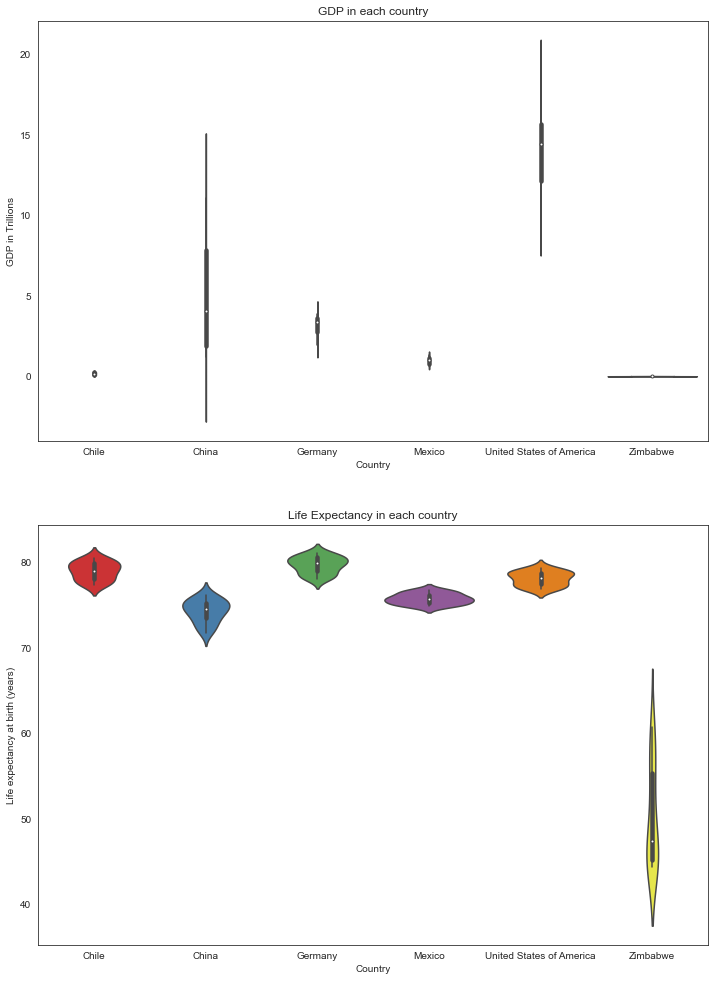

In [24]:
sns.set_style('white')

plt.figure(figsize=(12,17))

plt.subplot(2, 1, 1)
sns.violinplot(data=df, x='Country', y='GDP in Trillions')
plt.title('GDP in each country')

plt.subplot(2, 1, 2)
sns.violinplot(data=df, x='Country', y='Life_Exp')
plt.title('Life Expectancy in each country')
plt.ylabel('Life expectancy at birth (years)')

plt.show()

**Summary:** Another way to show distribution of data are violin plots. This visualization confirms earlier conclusions. In both cases on x-axis are the country and y-axis represent GDP in trillion U.S. dollars and Life Expectancy (respectively). 
* First plot shows that China and U.S.A. have relatively wide range compared to others countries. 
* Second plot shows that range is narrow for presented countries except Zimbabwe where there range was wide between 30s and  60s.

## Box Plot

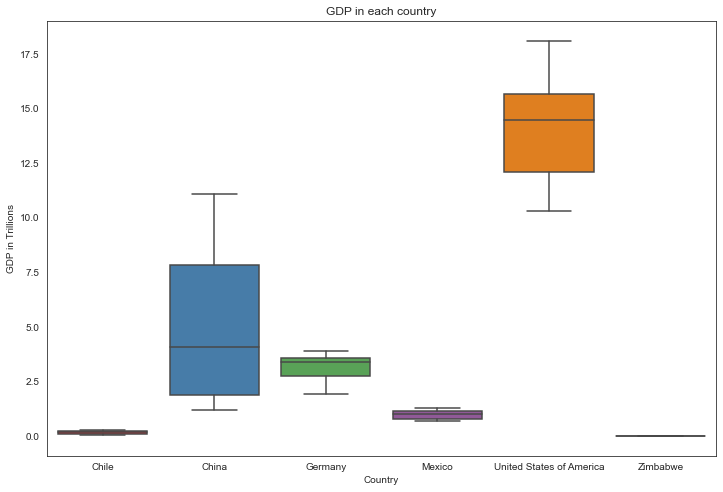

In [25]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='Country', y='GDP in Trillions')
plt.title('GDP in each country')
plt.show()

**Summary:** Box plot are another way of visualization data. It show 5 important metrics:
* min value
* max value
* median
* Quartile 1
* Quartile 3

As a previous visualization show the China and U.S.A. interquartile range are wider than for rest of countries.

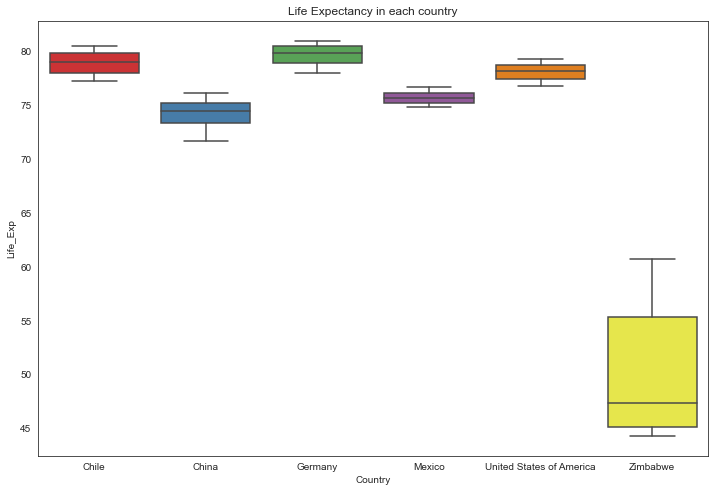

In [26]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='Country', y='Life_Exp')
plt.title('Life expectancy at birth (years)')
plt.title('Life Expectancy in each country')
plt.show()

**Summary:** The same results as previous are shown on box plot above which confirms that Zimbabwe interquartile range is wider than other countries. All other countries shows relatively close in figure. 

## Hypothesis Testing

Next to data visualization the goal of this project was to find out **is there exist correlation between GDP and Life Expectancy**. As my visualizations shown that some kind of correlation occurs but **the question now is how strong is it?** 

_In addition I would like to know if Life Expectancy is statistically different in a wealthy countries in compare to those with lower GDP._

First I need to test whether a sample differs from a normal distribution so I performed **normaltest from stats.scipy**

In [27]:
# Normality test 
_, p_val_gdp = normaltest(df['GDP in Trillions'])
_, p_val_life = normaltest(df['Life_Exp'])

alpha = 0.05

norm_test = pd.DataFrame({'p_value':[p_val_gdp, p_val_life]}, index=['GDP', 'Life Expectation'])
norm_test['Normality'] = norm_test.p_value.apply(lambda x: 'Rejected' if x < alpha else 'Accepted')

display(norm_test.style
        .set_caption('Normality test with confidence at 95%')
        .set_properties(width=df))

,p_value,Normality
GDP,0.000007,Rejected
Life Expectation,0.000000,Rejected


The null hypothesis says that value comes from a normal distribution and it can be rejected after performing normality test so the second step is to perform **Kendall's test** to find out the correlation. 

In [28]:
# Kendall test 
corr, p_val = kendalltau(df['GDP in Trillions'], df['Life_Exp'])
ken_test  = pd.DataFrame({'value':[corr, p_val]}, index=['Kendall Tau Correlation', 'p_value'])

display(ken_test.style
        .set_caption('Kendall Tau Test')
        .set_properties(width=df))

,value
Kendall Tau Correlation,0.370567
p_value,0.000000


Values close to 1 indicate strong agreement, and values close to -1 indicate strong disagreement. I found moderate agreements that this two values are correlated and the following scatter plot confirm this conclusion. 

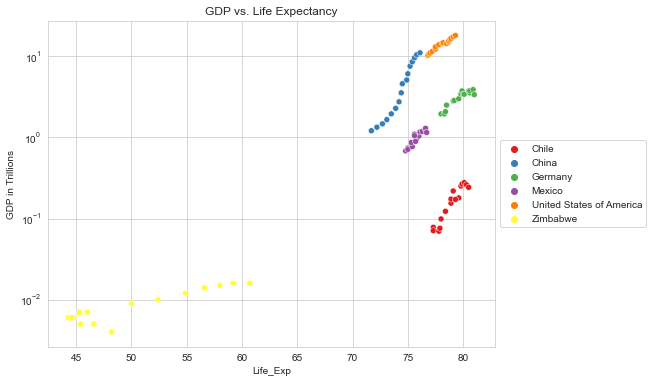

In [29]:
sns.set_style('whitegrid')
plt.figure(figsize=(8, 6))
ax = sns.scatterplot(data=df, x='Life_Exp', y='GDP in Trillions', hue='Country')
plt.legend(loc=6, bbox_to_anchor=(1, 0.5), ncol=1)
plt.title('GDP vs. Life Expectancy')
plt.yscale('log')

plt.show()

**Summary:** GDP logarithmic scale improve readability. It seems that higher GDP is correlated to better Life Expectancy but this is not the only factor. Even than GDP of Chile is smaller than GDP of U.S.A, China, Mexico or Germany their Life Expectancy is almost as good as German is. This fact strengthen the result of a moderate correlation.

#### Hypothesis Testing - wealthy countries

Does it exist a statistical evidence that nations with higher GDPs have an higher Life Expectancy?

* **NULL HYPOTHESIS:** nations with an higher GDP do not have a greater Life Expectancy
* **ALTERNATIVE HYPOTHESIS:** nations with an higher GDP have a greater Life Expectancy

Test will compare following groups:

* high_gdp = United States of America, China, Germany
* low_gdp = Chile, Mexico 

**NOTE:** Zimbabwe was excluded from this testing due to their hard situation connected to the civil war struggle the country. Adding Zimbabwe to low_gdp group will probably bias the result of the test towards wealthy nations so I want to focus on countries with similar external conditions, in order to have a meaningful comparison.

In order to avoid time-related effects, I will focus on recent times: only data from 2015 are considered.

In [30]:
# Divide country by GDP groups
high_gdp = ['United States of America', 'China', 'Germany']
low_gdp = ['Mexico', 'Chile']
high_gdp_df = df[(df.Country.isin(high_gdp)) & (df.Year == 2015)].reset_index(drop=True).copy()
low_gdp_df = df[(df.Country.isin(low_gdp)) & (df.Year == 2015)].reset_index(drop=True).copy()


#### 2 - sample T-test

In [31]:
aplha = 0.05 # significant level
t_stat, p_val = ttest_ind(high_gdp_df.Life_Exp, low_gdp_df.Life_Exp)
result = ('significant:\nNations with an higher GDP have an higher life expectancy.' 
          if (p_val/2 < alpha) & (t_stat > 0) else 
          'not significant:\nThere is no evidence that nations with an higher GDP have an higher life expectancy.')


two_test  = pd.DataFrame({'value':[alpha, p_val, t_stat]}, index=['Significance level', 'p_value', 't-statistic'])

print(f'\n2-sample t-test is {result}\n')

display(two_test.style
        .set_caption('2 sample T-test results')
        .set_properties(width=df))



2-sample t-test is not significant:
There is no evidence that nations with an higher GDP have an higher life expectancy.



,value
Significance level,0.050000
p_value,0.937094
t-statistic,0.085714


**The alternative hypothesis is rejected** and the box plot below confirm this conclusion. 

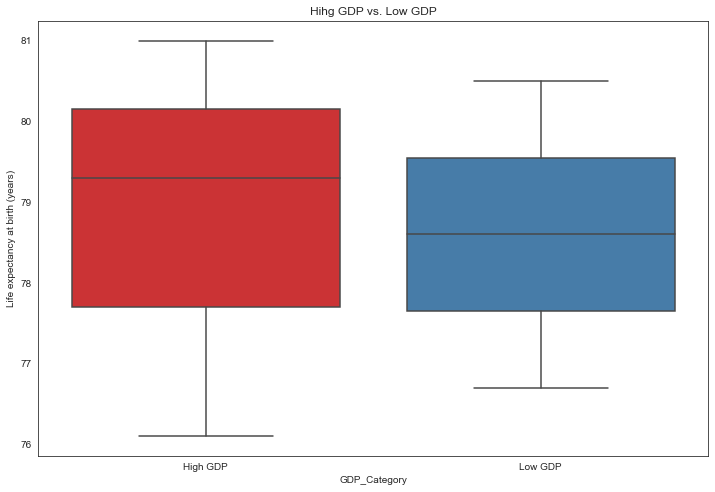

In [32]:
# agregate dataframes 
both_gdp = pd.concat([high_gdp_df, low_gdp_df])
both_gdp['GDP_Category'] = None
both_gdp.loc[both_gdp.Country.isin(high_gdp), 'GDP_Category'] = 'High GDP'
both_gdp.loc[both_gdp.Country.isin(low_gdp), 'GDP_Category'] = 'Low GDP'

# Boxplot
sns.set_style('white')
plt.figure(figsize=(12, 8))
sns.boxplot(data=both_gdp, x='GDP_Category', y='Life_Exp')
plt.title('Hihg GDP vs. Low GDP')
plt.ylabel('Life expectancy at birth (years)')
plt.show()

**Summary:** Both boxplot have similar interquartile range and median. Whisker of high GDP countries are more extended than low GDP countries and this is consequences of Germany and China level of Life Expectancy. 

## Final Conclusions

All tasks in this project concentrated to shows some magnificent visualization which can help us answer the questions asked at the beginning. 

+ Has Life Expectancy increased over time in the six nations?
    + Yes, in each country Life Expectancy increased in 2000-2015 years and the most higher growth was in Zimbabwe. 
+ Has GDP increased over time in the six nations?
    + Yes, in each country GDP increased in 2000-2015 years and China economy noted the flourishing in analyzed time. 
+ Is there a correlation between GDP and Life Expectancy of a country?
    + Yes, there is a correlation between two variables: GDP and Life Expectancy. Due to Kendall test we know that correlation is 0.37. 
+ What is the average Life Expectancy and GDP in these nations?
    + Average Life Expectancy for all countries (except Zimbabwe) was around mid 70 years. Average GDP for United States of America was outstanding and for the rest of countries (except Zimbabwe) result was close in figure. 
+ What is the distribution of that Life Expectancy and GDP?
    + The distribution for Life Expectancy was left-skewed which mean that most observation was on the right side. The distribution for GDP was right-skewed which mean that most obserwation was on the left side.

Another interesting insights is _connected with hypothesis testing I did._ After conducted 2 sample t-test we know that nations with an higher GDP do not have a greater Life Expectancy **so statistically there is no evidence to difference exists between analyzed groups in term of Life Expectancy.** . _Of course I can noticed that there is positive correlations between Gross Domestic Product and Life Expectancy but it is not the only one factor which can involve to this parameter._

**Firstly let's see what Life Expectancy is.** The term “Life Expectancy” refers to the number of years a person can expect to live. By definition, Life Expectancy is based on an estimate of the average age that members of a particular population group will be when they die. **Without any doubts the level of how population is wealthy impact to the years their live but also there are several others factors which can have a huge impact to the level of this parameter like:**

* diet
* physical activity
* unhealthy habits such as smoking or drinking alcohol
* healthy sleep
* environment pollution
* diseases